# Time Series Forecasting And Portfolio Optimization For Guide Me in Finance (GMF) Investments

### Add Root Directory and Ignore Warnind

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


### Import Vecessarily Library

In [2]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
import yfinance as yf # type: ignore
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore


### This Project is focus on Apply time series forcasting to historical data to enhance portfolio management strategies

### The Steps:
    1. Extract historical data ✅
    2. Preprocess and analyze this data to identify trends and patterns. ✅
    3. Develop and evaluate forecasting models to predict future market movements.
    4. Recommending portfolio adjustments 

## Data Preprocessing and Exploratory Data Analysis (EDA)

Prepare and understand the historical financial data for Tesla, BND, and SPY over the period from January 1, 2015, to October 31, 2024, using YFinance

In [8]:
# Define the tickers and fetch data from YFinance
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

data_frames = {}

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] 
    data_frames[ticker] = data

tsla_data = data_frames["TSLA"]
bnd_data = data_frames["BND"]
spy_data = data_frames["SPY"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## TSLA Datasets

In [12]:
tsla_data.head(data.size)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600


## BND Datasets

In [10]:
bnd_data.head(bnd_data.size)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,63.358765,82.650002,82.690002,82.419998,82.430000,2218800
2015-01-05 00:00:00+00:00,63.542751,82.889999,82.919998,82.699997,82.739998,5820100
2015-01-06 00:00:00+00:00,63.726711,83.129997,83.379997,83.029999,83.029999,3887600
2015-01-07 00:00:00+00:00,63.765106,83.180000,83.279999,83.050003,83.139999,2433400
2015-01-08 00:00:00+00:00,63.665359,83.050003,83.110001,82.970001,83.110001,1873400
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,73.081184,73.309998,73.440002,73.169998,73.279999,6219500
2024-10-25 00:00:00+00:00,72.931664,73.160004,73.480003,73.129997,73.480003,4641400
2024-10-28 00:00:00+00:00,72.841942,73.070000,73.279999,72.949997,73.239998,4582800


## SPY Datasets

In [11]:
spy_data.head(spy_data.size)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,173.173782,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05 00:00:00+00:00,170.046341,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06 00:00:00+00:00,168.444672,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07 00:00:00+00:00,170.543671,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08 00:00:00+00:00,173.569946,205.899994,206.160004,203.990005,204.009995,147217800
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,579.239990,579.239990,580.059998,576.570007,579.979980,34979900
2024-10-25 00:00:00+00:00,579.039978,579.039978,584.460022,578.080017,581.510010,47268200
2024-10-28 00:00:00+00:00,580.830017,580.830017,582.710022,580.520020,582.580017,30174700


### Pre-processing

In [13]:
def preprocess_data(data):
    data = data.reset_index()
    for column in ['Open', 'Close', 'High', 'Low', 'Volume']:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    data = data.fillna(method='ffill').dropna()
    return data


### Apply preprocessing to each dataset

In [14]:
tsla_data = preprocess_data(tsla_data)
bnd_data = preprocess_data(bnd_data)
spy_data = preprocess_data(spy_data)


### Pre-processed TSLA Datasets

In [15]:
tsla_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


### Pre-processed BND Datasets

In [16]:
bnd_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,63.358765,82.650002,82.690002,82.419998,82.430000,2218800
1,2015-01-05 00:00:00+00:00,63.542751,82.889999,82.919998,82.699997,82.739998,5820100
2,2015-01-06 00:00:00+00:00,63.726711,83.129997,83.379997,83.029999,83.029999,3887600
3,2015-01-07 00:00:00+00:00,63.765106,83.180000,83.279999,83.050003,83.139999,2433400
4,2015-01-08 00:00:00+00:00,63.665359,83.050003,83.110001,82.970001,83.110001,1873400


### Pre-processed SPY Datasets

In [17]:
spy_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,173.173782,205.429993,206.880005,204.179993,206.380005,121465900
1,2015-01-05 00:00:00+00:00,170.046341,201.720001,204.369995,201.350006,204.169998,169632600
2,2015-01-06 00:00:00+00:00,168.444672,199.820007,202.720001,198.860001,202.089996,209151400
3,2015-01-07 00:00:00+00:00,170.543671,202.309998,202.720001,200.880005,201.419998,125346700
4,2015-01-08 00:00:00+00:00,173.569946,205.899994,206.160004,203.990005,204.009995,147217800


In [38]:
def perform_eda(data, ticker):
    # Plot Close Price Trend
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label=f'{ticker} Close Price')
    plt.title(f'{ticker} Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
    # Calculate daily percentage change for volatility analysis
    data['Daily_Return'] = data['Close'].pct_change()
    
    # Plot daily returns
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Daily_Return'], label=f'{ticker} Daily Returns')
    plt.title(f'{ticker} Daily Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.show()
    
    # Calculate rolling averages and standard deviations
    data['Rolling_Mean'] = data['Close'].rolling(window=20).mean()
    data['Rolling_Std'] = data['Close'].rolling(window=20).std()
    
    # Plot rolling mean and std
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.plot(data['Date'], data['Rolling_Mean'], label='20-Day Rolling Mean')
    plt.plot(data['Date'], data['Rolling_Std'], label='20-Day Rolling Std', linestyle='--')
    plt.title(f'{ticker} Rolling Mean & Std Dev')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Time Series Decomposition
    decomposition = seasonal_decompose(data['Close'], model='additive', period=252)
    plt.figure(figsize=(12,6))
    decomposition.plot()
    plt.suptitle(f'{ticker} Time Series Decomposition')
    plt.show()
    
    # VaR and Sharpe Ratio for Tesla
    VaR = data['Daily_Return'].quantile(0.05)
    print(f"Value at Risk (VaR) at 5% confidence level for {ticker}: {VaR}")
    
    # Sharpe Ratio
    mean_return = data['Daily_Return'].mean()
    std_dev_return = data['Daily_Return'].std()
    sharpe_ratio = mean_return / std_dev_return * np.sqrt(252)
    print(f"Sharpe Ratio for {ticker}: {sharpe_ratio}")




## Exploratory Data Analysis (EDA)

### Perform EDA For TSLA

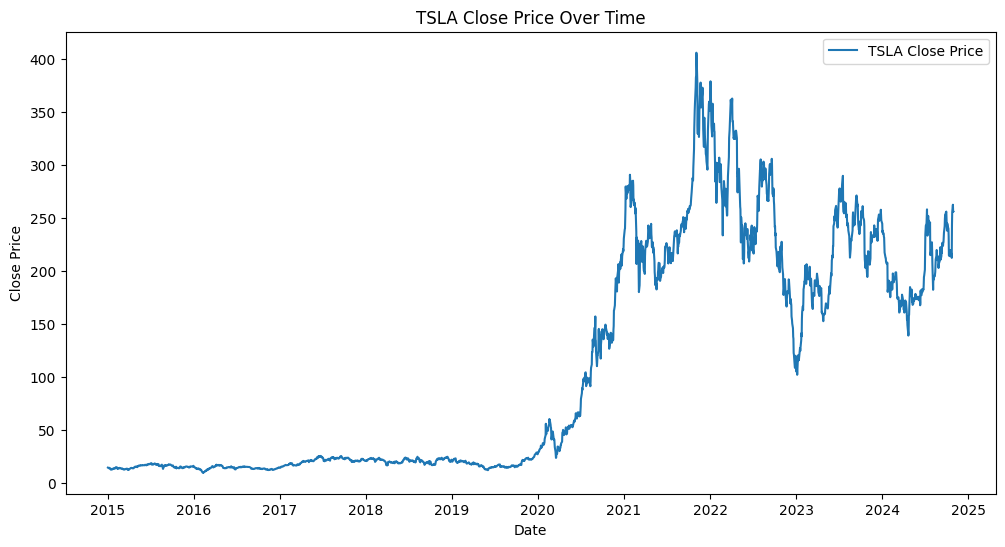

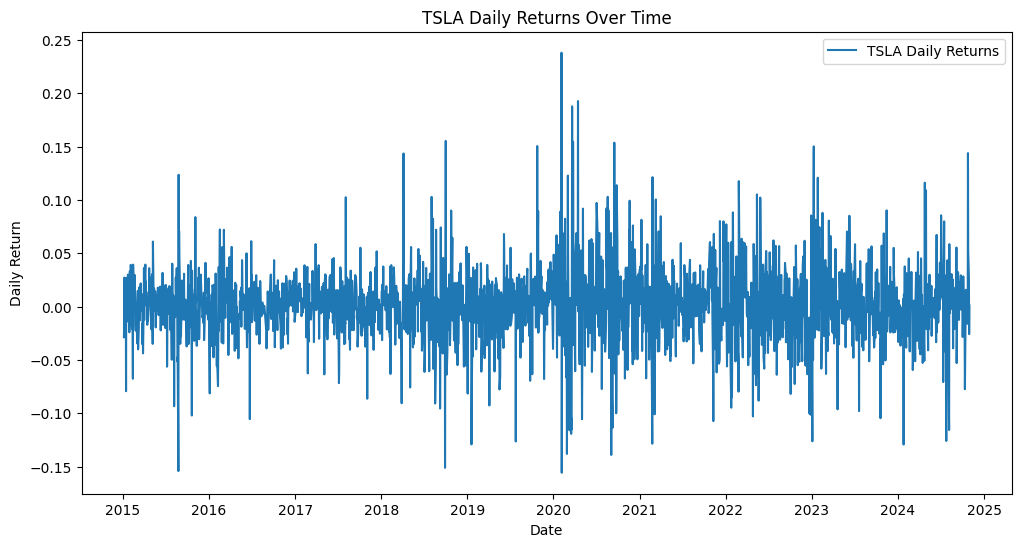

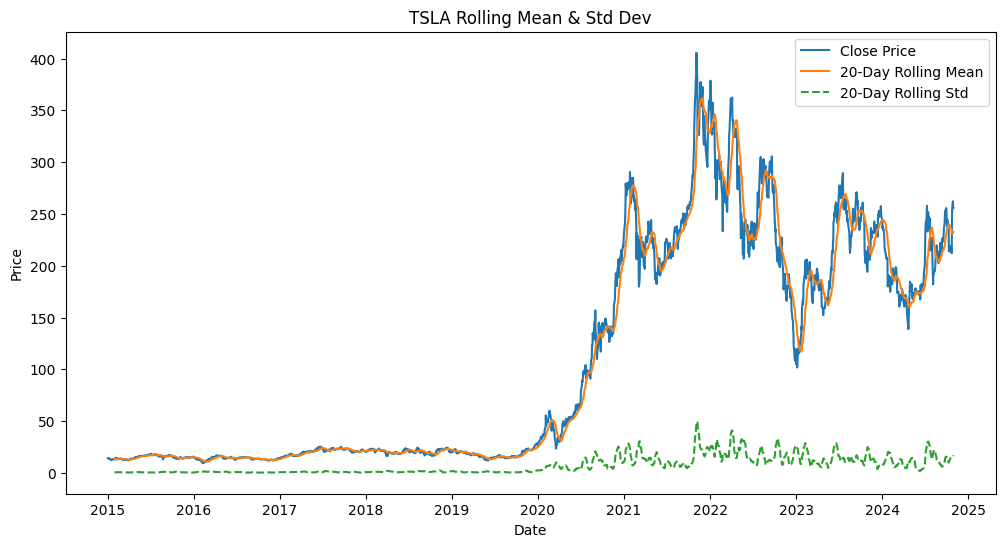

<Figure size 1200x600 with 0 Axes>

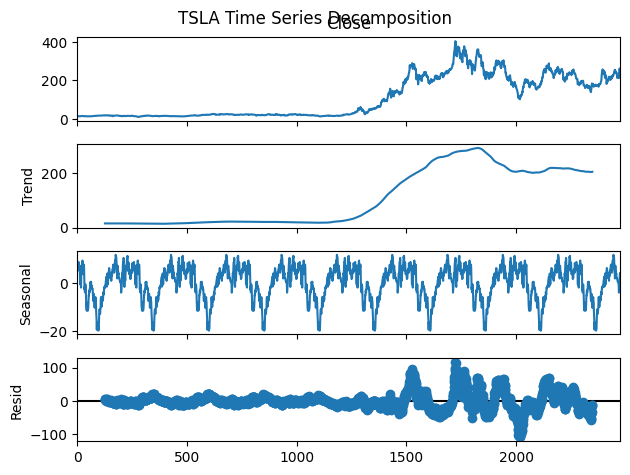

Value at Risk (VaR) at 5% confidence level for TSLA: -0.05084846402024574
Sharpe Ratio for TSLA: 0.8152411200617222


In [39]:
perform_eda(tsla_data, 'TSLA')


### Perform EDA For BND

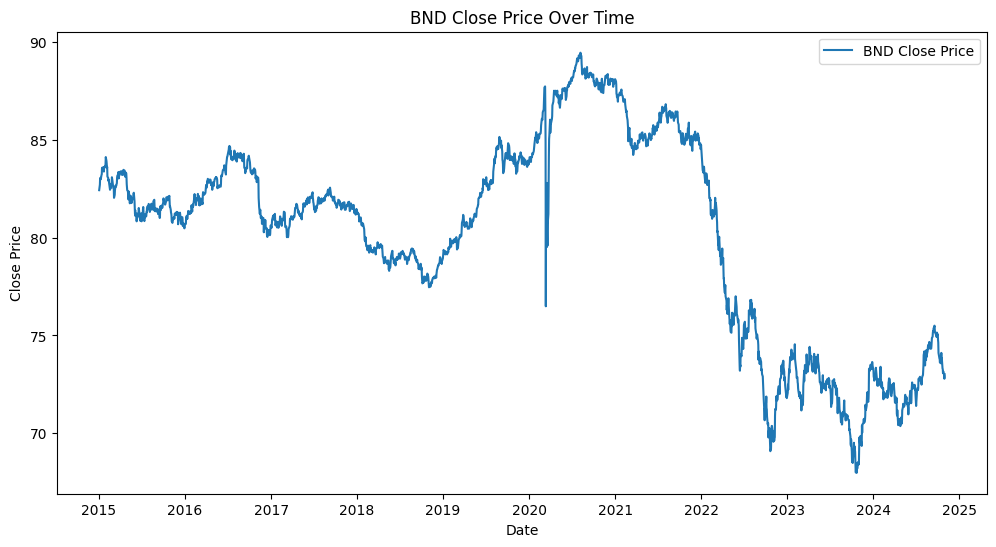

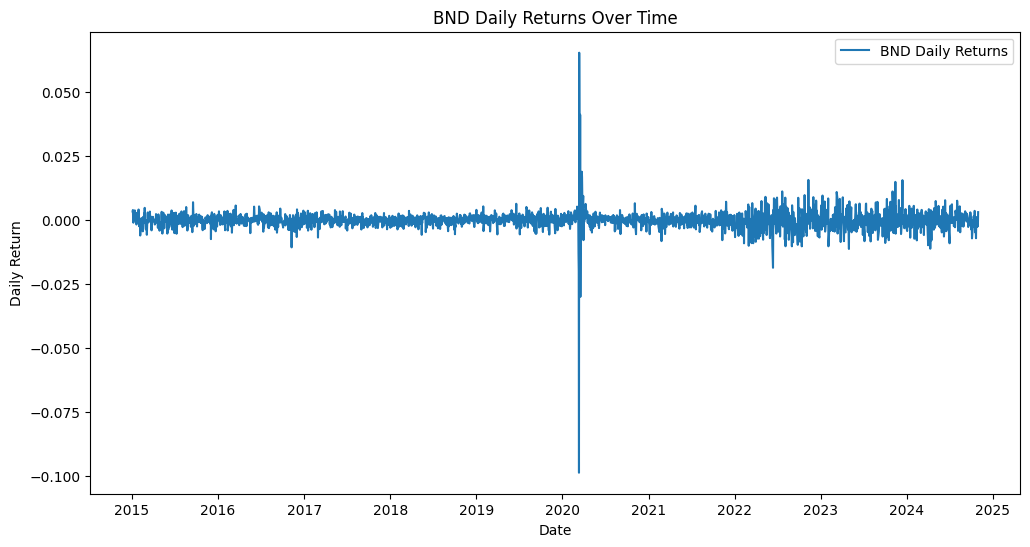

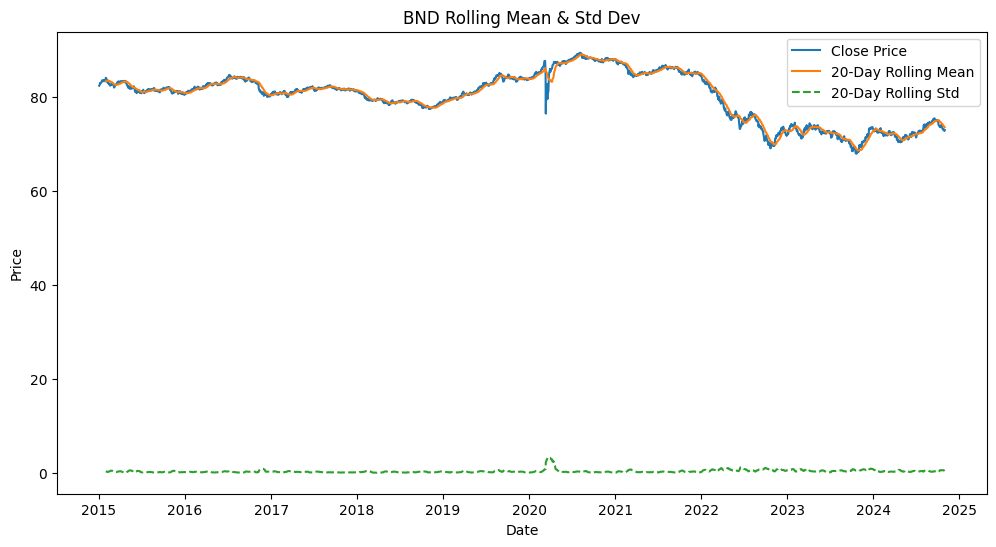

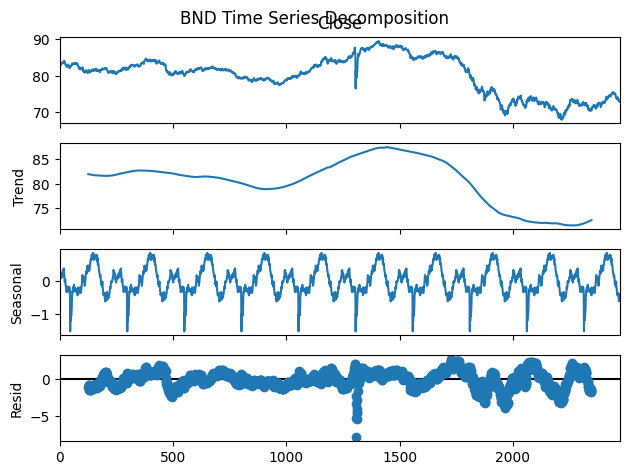

Value at Risk (VaR) at 5% confidence level for BND: -0.004738966015040091
Sharpe Ratio for BND: -0.1672176144735155


In [28]:
perform_eda(bnd_data, 'BND')



### Perform EDA For SPY

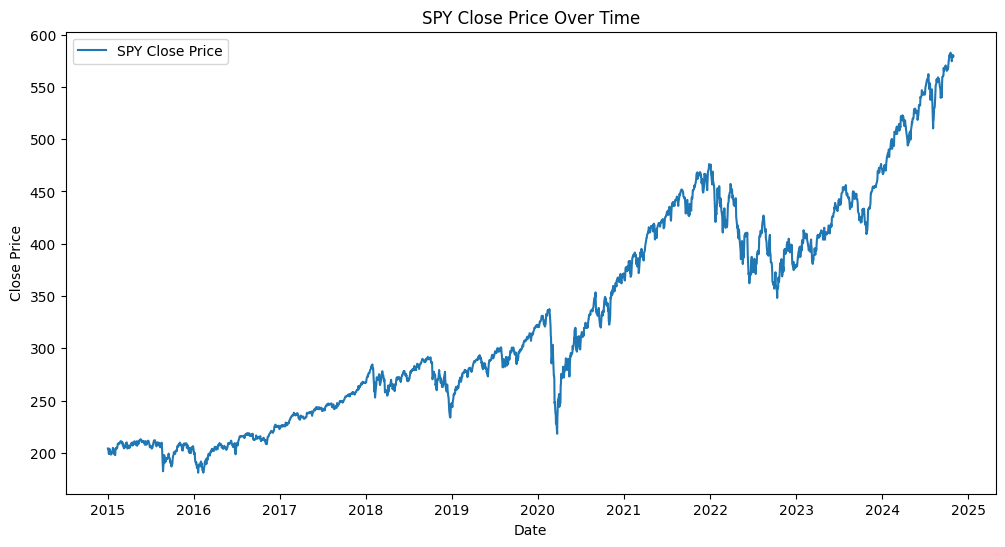

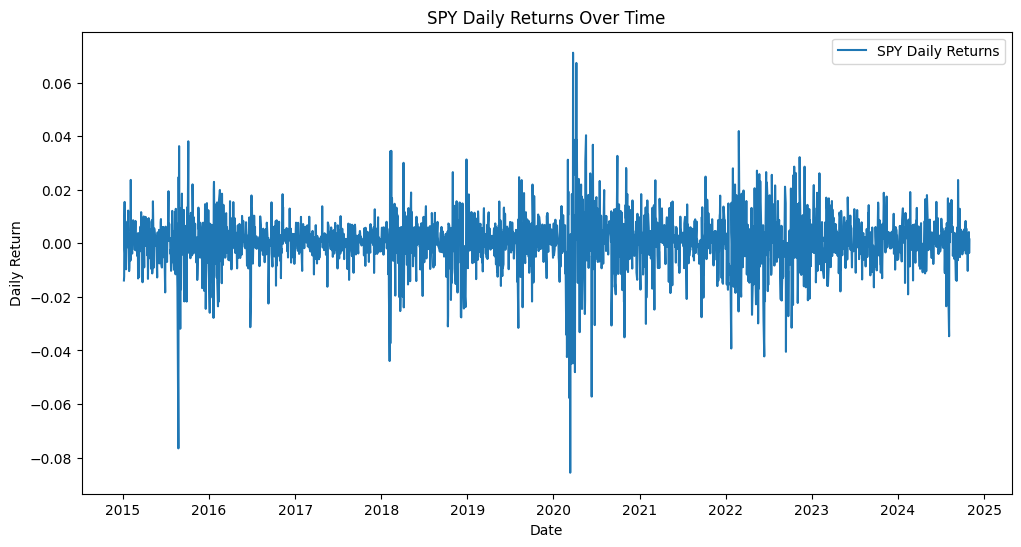

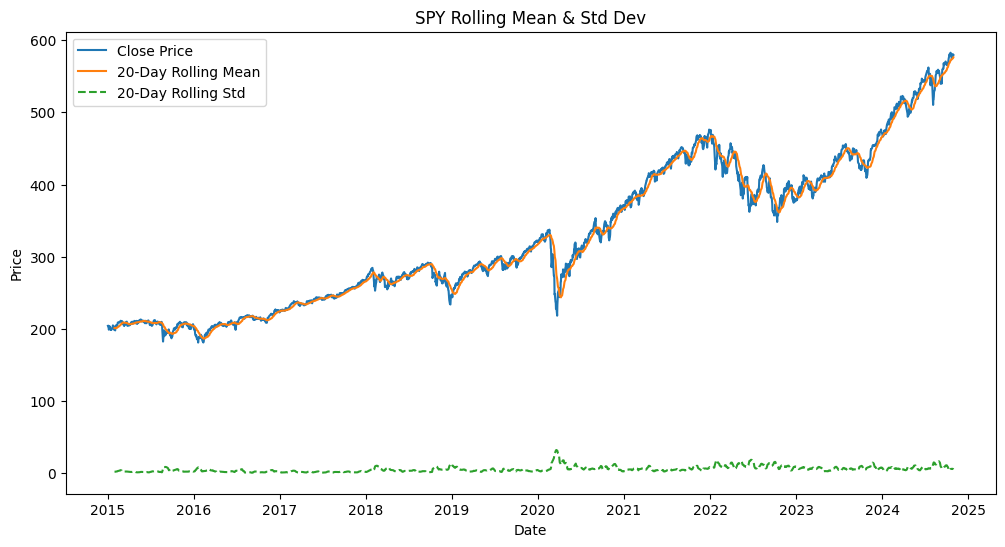

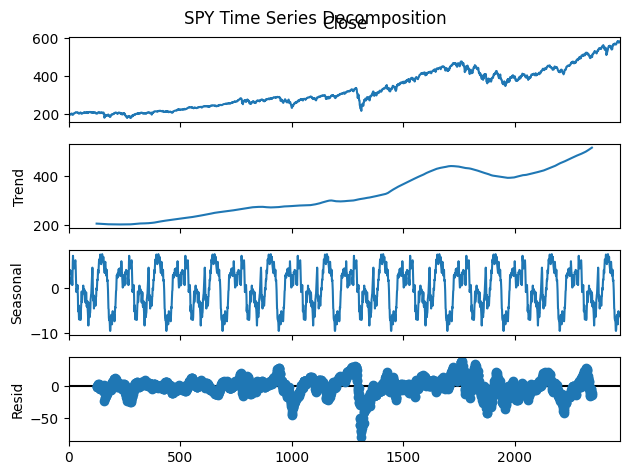

<Figure size 1600x1000 with 0 Axes>

Value at Risk (VaR) at 5% confidence level for SPY: -0.015514577351767644
Sharpe Ratio for SPY: 0.7389974779853575


In [31]:
perform_eda(spy_data, 'SPY')
